In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import locale
locale.setlocale(locale.LC_ALL, '')

'Portuguese_Brazil.1252'

In [3]:
df = pd.read_csv('tudo.csv')

In [4]:
df.shape

(44500, 10)

In [5]:
df.columns

Index(['name', 'sale_id', 'product_id', 'product', 'price_y', 'quantity',
       'price_x', 'created_at', 'updated_at', 'email'],
      dtype='object')

In [6]:
df.head()

,name,sale_id,product_id,product,price_y,quantity,price_x,created_at,updated_at,email
0,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,3.89990,2433.800,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net
1,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,4.00000,1196.580,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net
2,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,1.38452,1975.000,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net
3,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,2.22500,119.526,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net
4,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,2.89000,2386.940,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44500 entries, 0 to 44499
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        44500 non-null  object 
 1   sale_id     44500 non-null  object 
 2   product_id  44500 non-null  int64  
 3   product     44500 non-null  object 
 4   price_y     44500 non-null  float64
 5   quantity    44500 non-null  float64
 6   price_x     44500 non-null  float64
 7   created_at  44500 non-null  object 
 8   updated_at  44500 non-null  object 
 9   email       44500 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.4+ MB


In [8]:
l_categoricas = df.describe(include = object)
l_categoricas

,name,sale_id,product,created_at,updated_at,email
count,44500,44500,44500,44500,44500,44500
unique,3998,10000,200,10000,10000,4000
top,Elwyn Koepp,0ff1ad6b-3d65-333f-be01-ddf08bb4736f,Alba Meadow,1988-05-09 21:13:39+00:00,1986-12-24 15:14:55+00:00,christy10@example.org
freq,26,6,223,6,6,18


In [9]:
l_numericas = df.describe(include = float)
l_numericas

,price_y,quantity,price_x
count,44500.000000,44500.000000,44500.000000
mean,1897.930295,2.505359,1999.161519
std,1144.833746,1.446676,1155.451744
min,58.000000,0.000000,0.055818
25%,902.364000,1.241923,994.173000
50%,1754.000000,2.500000,2001.355000
75%,2988.600000,3.779000,3001.707500
max,3982.340000,5.000000,4000.000000


In [10]:
list(l_categoricas)

['name', 'sale_id', 'product', 'created_at', 'updated_at', 'email']

In [11]:
df.isnull().sum()

name          0
sale_id       0
product_id    0
product       0
price_y       0
quantity      0
price_x       0
created_at    0
updated_at    0
email         0
dtype: int64

In [14]:
def groupby_operation (dataframe, groupbycolumn, operation_column, operation,
                      size=None, total=None, title=None, height=10, width=5, index=None):
    
    fig = plt.figure()
    fig.set_size_inches(width, height)
    
    ax1 = plt.subplot(1,1,1)
    
    if operation == 'sum':
        serie = dataframe.groupby(groupbycolumn)[operation_column].sum().sort_values(ascending=True).astype(float)
    elif operation == 'count':
        serie = dataframe.groupby(groupbycolumn)[operation_column].count().sort_values(ascending=True). astype(float)
    else:
        serie = dataframe.groupby(groupbycolumn)[operation_column].count().sort_values(ascending-True).astype(float)
    
    if not total:
            total = serie.sum()
    
    corte = ''
    
    if size and len(serie) > size:
        serie = serie.sort_values(ascending=False)
        serie = serie[:size]
        serie = serie.sort_values(ascending=True)
        corte = ' ({} maiores)'.format(size)
    
    if not title:
        
        if operation_column:
            column = operation_column
        else:
            column = serie.name
        title = "soma de {} agrupado por {}{}".format(operation_column, groupbycolumn, corte)
    
    ax1.barh(serie.index, serie, align='center', color='c', ecolor='black')
    percentage = serie/total*100
    number_distance = serie.max()*0.005
    for i, v in enumerate(serie):
        pct = locale.format_string('%.2f', percentage[i], True)
        v_str = locale.format_string('%.2f', v, True)
        ax1.text(v+number_distance , i-0.2, '{0} ({1}%)'.format(v_str, pct), color='k')
    ax1.set(title=title,
           xlabel='',
           ylabel='')
    sns.despine(left=True, bottom=True)

    plt.show()

def show_value_counts(serie, column_desc=None, grain='Registers', 
                      size=None, total=None, title=None, height=10, width=5, index=None):
    fig = plt.figure()
    fig.set_size_inches(width, height)

    ax1 = plt.subplot(1,1,1)

    serie = serie.value_counts().sort_values(ascending=True)

    if not total:
        total = serie.sum()
    
    corte = ''
    
    if (index):
        serie = serie.rename(index)
    
    if serie.index.dtype != 'object':
        if serie.index.dtype == 'float64':
            serie.index = serie.index.map(int)
        serie.index = serie.index.map(str)
    serie.index = serie.index.map(str)
    
    if size and len(serie) > size:
        serie = serie.sort_values(ascending=False)
        serie = serie[:size]
        serie = serie.sort_values(ascending=True)
        corte = ' ({} mais frequentes)'.format(size)
    
    if not title:
        if column_desc:
            column = column_desc
        else:
            column = serie.name
        title = "Nº de {} por {}{}".format(grain, column, corte)
   
    ax1.barh(serie.index, serie, align='center', color='c', ecolor='black')
    percentage = serie/total*100
    number_distance = serie.max()*0.005
    
    for i, v in enumerate(serie):
        pct = locale.format_string('%.2f', percentage[i], True)
        ax1.text(v+number_distance , i-0.2, '{0:,} ({1}%)'.format(v, pct), color='k')
    ax1.set(title=title,
           xlabel='',
           ylabel='')
    sns.despine(left=True, bottom=True)

    plt.show()
    
     

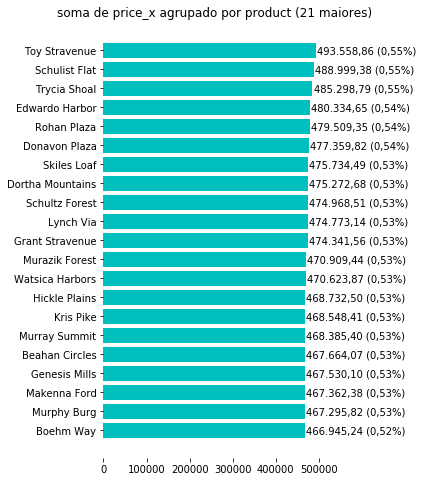

In [15]:
groupby_operation(df, groupbycolumn='product', operation_column='price_x', operation='sum',
                 size=21, total=None, title=None, height=8, width=4)

In [16]:
df['product'].value_counts()

Alba Meadow       223
Pearline Glen     223
Mallory Canyon    223
Durgan Centers    223
Retha Summit      223
                 ... 
Melvin Port       222
Robyn Overpass    222
Brent Common      222
Fanny Summit      222
Erna Mountain     222
Name: product, Length: 200, dtype: int64

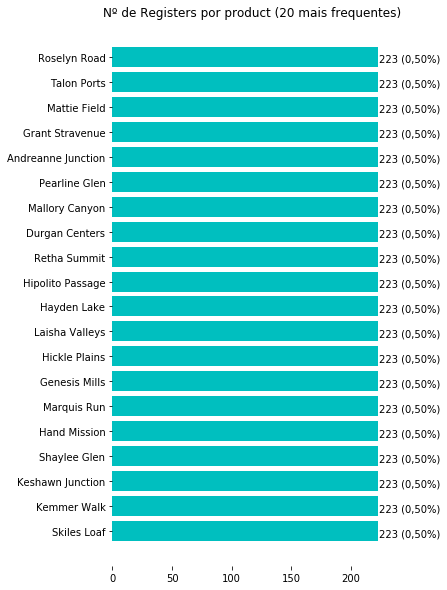

In [17]:
show_value_counts(df['product'], size=20)

In [18]:
df['updated_at'] = pd.to_datetime(df.updated_at, utc=True)
df.index = df.updated_at

In [19]:
vendas_por_mes = df.groupby([df['created_at'].index.year, df['created_at'].index.month]).price_x.sum()

In [20]:
vendas_por_mes.index = pd.Series(vendas_por_mes.index.values).apply(lambda x:str(x[0])+'-'+str(x[1]))

In [29]:
!pip install -q ipywidgets

In [22]:
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

In [30]:
layout = dict(title = 'Vendas por mês',
              xaxis = dict(title = 'Mês'),
              yaxis = dict(title = 'Vendas ($)'),
             )
data = [go.Scatter(x=vendas_por_mes.index, y=vendas_por_mes, mode='lines+markers',
                   marker=dict(color='blue'))]
fig = dict(data=data, layout=layout)
iplot(fig)

In [24]:
dias = {0: 'Segunda', 1:'Terça', 2:'Quarta', 3:'Quinta', 4:'Sexta', 5:'Sábado', 6:'Domingo'}

In [25]:
df.groupby([df.index.weekday]).price_x.sum()

updated_at
0    1.323495e+07
1    1.286437e+07
2    1.210800e+07
3    1.305623e+07
4    1.255605e+07
5    1.246999e+07
6    1.267310e+07
Name: price_x, dtype: float64

In [31]:
receita_por_dia = df.groupby([df.index.weekday]).price_x.sum()
layout = dict(title = 'Vendas por dia da semana',
             xaxis = dict(title = 'Dia da Semana'),
             yaxis = dict(title = 'Vendas ($)'),
             )
data = [go.Scatter(x=list(map(lambda x: dias[x], receita_por_dia.index)),
                  y=receita_por_dia, mode='lines+markers',
                  marker=dict(color='blue'))]
fig = dict(data=data, layout=layout)
iplot(fig)